<a href="https://colab.research.google.com/github/hf2000510/infectious_disease_modelling/blob/master/part_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Make sure to open in Colab to see the plots!

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random

In [20]:
def plotseigrd(t, S, E, I, R, G, D):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Suscetivel')
    ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposto')
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infectado')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recuperado')
    ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Morto')
    ax.plot(t, G, 'gray', alpha=0.7, linewidth=2, label='Grave')
    ax.plot(t, S+E+I+R+D+G, 'c--', alpha=0.7, linewidth=2, label='Total')
    ax.set_xlabel('Dias')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.title("Lockdown após 5000 mortes")
    plt.show()
    
def plotsingle(t, C, label, color):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, C, color, alpha=0.7, linewidth=2, label=label)
    ax.set_xlabel('Dias')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.title("Lockdown após 5000 mortes")
    plt.show()

In [33]:
def model(y, t, N, beta, gamma, delta, alpha, rho, theta):
    S, E, I, G, R, D = y
    
    def phi():
        return 0.3 + np.exp(-(t+10))
    
    def kappa():
        return 0.3 + G / N
    
    def A():
        return (N - D)/4
    
    def exposition():
        return beta * S * (I + E) / N

    def imigration(compartment, rate):
        return compartment * rate
    
    def close_borders(D):
        if D > 5000:
            return 0
        return 1
    
    def get_grave():
        return alpha * I * rho

    def show_symptoms():
        return delta * E
    
    def recovery():
        return (1 - alpha) * gamma * I
    
    def recovery_from_grave():
        return (1 - kappa()) * gamma * G
    
    def death():
        return kappa() * theta * G
        
    dSdt = -exposition() + (-imigration(S, phi()) + imigration(A(), phi())) * close_borders(D)
    dEdt = exposition() - show_symptoms() + (-imigration(E, phi()) + imigration(A(), phi()))*close_borders(D)
    dIdt = show_symptoms() - recovery() - get_grave() + (-imigration(I, phi()) + imigration(A(), phi())) * close_borders(D)
    dGdt = get_grave() - recovery_from_grave() - death()
    dRdt = recovery() + recovery_from_grave() + (-imigration(R, phi()) + imigration(A(), phi())) * close_borders(D)
    dDdt = death()
    
    return dSdt, dEdt, dIdt, dGdt ,dRdt, dDdt

In [34]:
N = 1_000_000
D = 5.0 # dias que demora o estado grave 
gamma = 1.0 / D 
delta = 1.0 / 5.0  # um sobre o número de dias que dura a incubação
R_0 = 4.0 # numero de pessoas que um infectado infecta
beta = R_0 * gamma 

kappa = 0.2  # taxa de morte
alpha = 0.2  # taxa de infectados que fica grava
rho = 1/9  # 1 sobre numero de dias de infecção até o estado grave
theta = 1/10 # tempo de duração do estado grave

S0, E0, I0, G0, R0, D0 = N, 0, 0, 0, 0, 0  # estado inicial

In [35]:
t = np.linspace(0, 99, 100) # tempo
y0 = S0, E0, I0, G0, R0, D0

# Integração das EDOs
ret = odeint(model, y0, t, args=(N, beta, gamma, delta, alpha, rho, theta))
S, E, I, G, R, D = ret.T

### População Suscetível

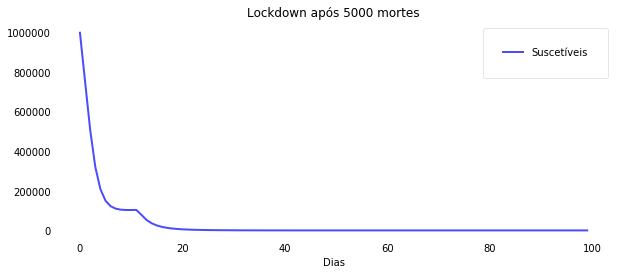

In [36]:
plotsingle(t, S, 'Suscetíveis', 'b')

### População Exposta

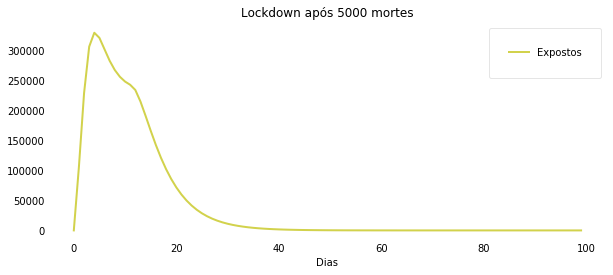

In [37]:
plotsingle(t, E, 'Expostos', 'y')

### População Infectada

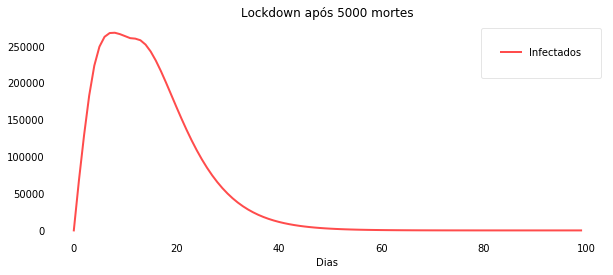

In [38]:
plotsingle(t, I, 'Infectados', 'r')

### População Em Estado grave

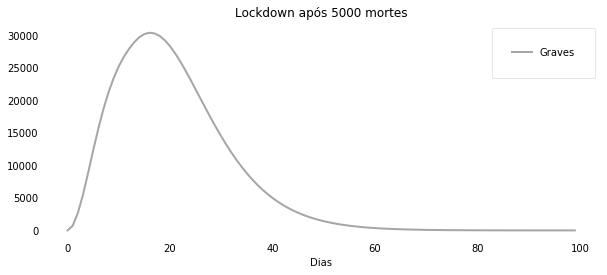

In [39]:
plotsingle(t, G, 'Graves', 'gray')

### População Recuperada

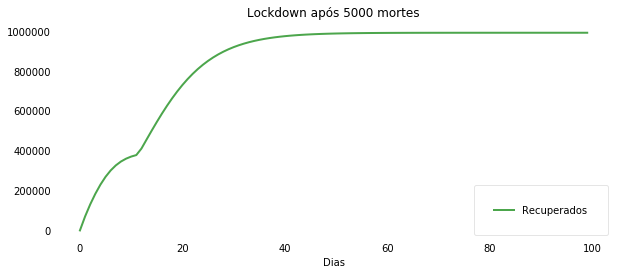

In [40]:
plotsingle(t, R, 'Recuperados', 'g')

### População Morta

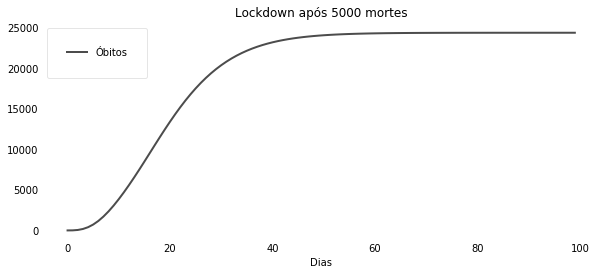

In [41]:
plotsingle(t, D, 'Óbitos', 'black')

### População Total

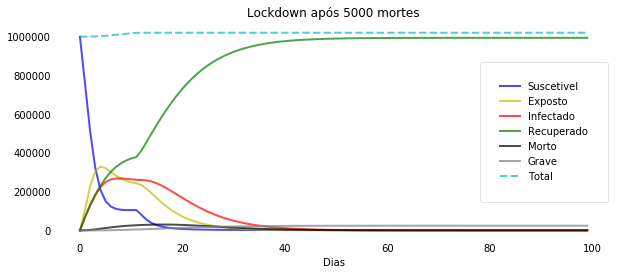

In [43]:
plotseigrd(t, S, E, I, R, D, G)

## Variação do parâmetro alpha

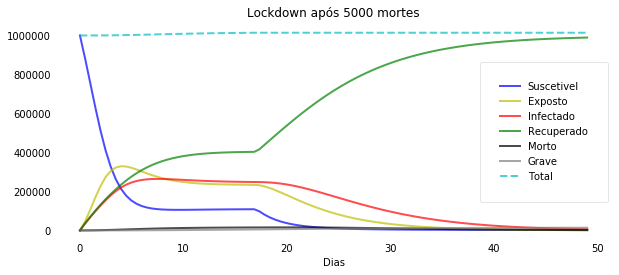

In [49]:
t = np.linspace(0, 49, 100) # tempo
# Integração das EDOs
alpha = 0.1
ret = odeint(model, y0, t, args=(N, beta, gamma, delta, alpha, rho, theta))
S, E, I, G, R, D = ret.T
plotseigrd(t, S, E, I, R, D, G)

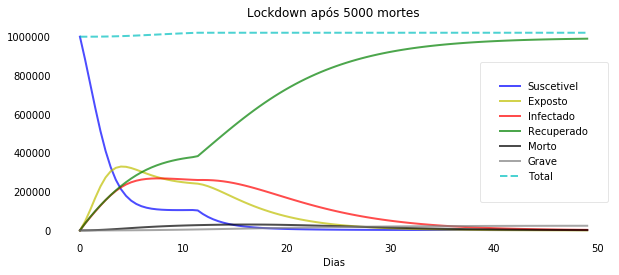

In [48]:
t = np.linspace(0, 49, 100) # tempo
# Integração das EDOs
alpha = 0.2
ret = odeint(model, y0, t, args=(N, beta, gamma, delta, alpha, rho, theta))
S, E, I, G, R, D = ret.T
plotseigrd(t, S, E, I, R, D, G)

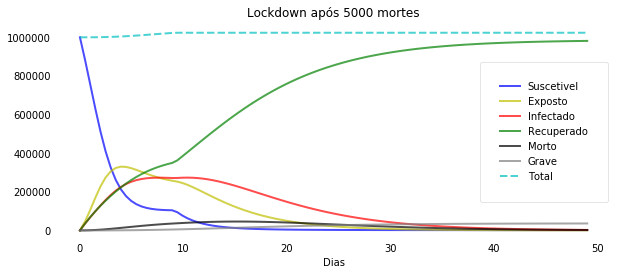

In [50]:
t = np.linspace(0, 49, 100) # tempo
# Integração das EDOs
alpha = 0.3
ret = odeint(model, y0, t, args=(N, beta, gamma, delta, alpha, rho, theta))
S, E, I, G, R, D = ret.T
plotseigrd(t, S, E, I, R, D, G)

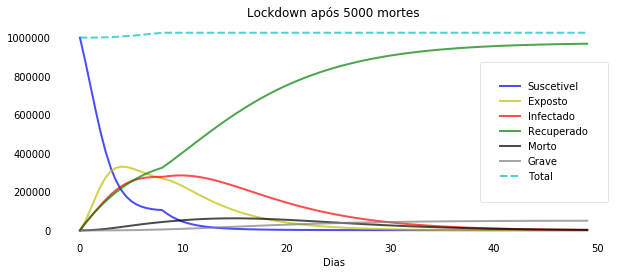

In [51]:
t = np.linspace(0, 49, 100) # tempo
# Integração das EDOs
alpha = 0.4
ret = odeint(model, y0, t, args=(N, beta, gamma, delta, alpha, rho, theta))
S, E, I, G, R, D = ret.T
plotseigrd(t, S, E, I, R, D, G)

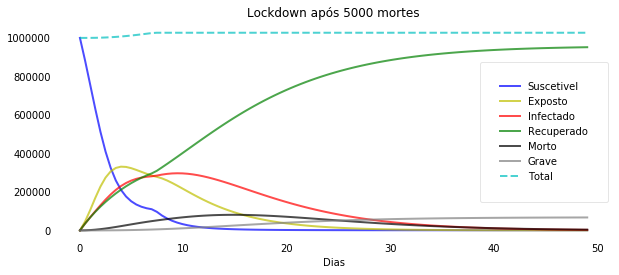

In [52]:
t = np.linspace(0, 49, 100) # tempo
# Integração das EDOs
alpha = 0.5
ret = odeint(model, y0, t, args=(N, beta, gamma, delta, alpha, rho, theta))
S, E, I, G, R, D = ret.T
plotseigrd(t, S, E, I, R, D, G)

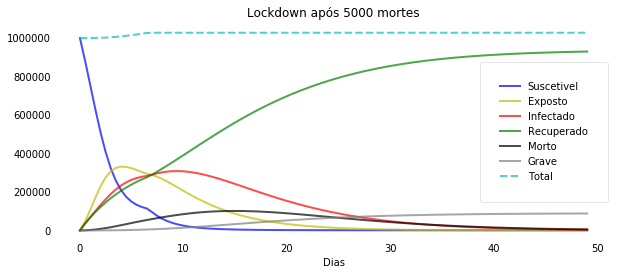

In [53]:
t = np.linspace(0, 49, 100) # tempo
# Integração das EDOs
alpha = 0.6
ret = odeint(model, y0, t, args=(N, beta, gamma, delta, alpha, rho, theta))
S, E, I, G, R, D = ret.T
plotseigrd(t, S, E, I, R, D, G)

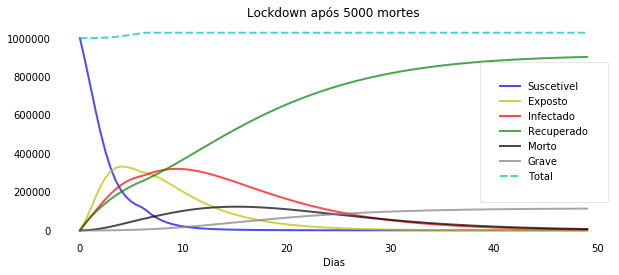

In [58]:

t = np.linspace(0, 49, 100) # tempo
# Integração das EDOs
alpha = 0.7
ret = odeint(model, y0, t, args=(N, beta, gamma, delta, alpha, rho, theta))
S, E, I, G, R, D = ret.T
plotseigrd(t, S, E, I, R, D, G)

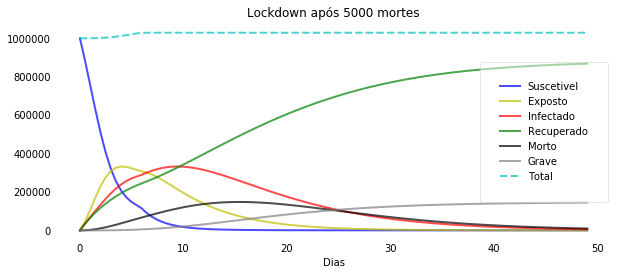

In [57]:
t = np.linspace(0, 49, 100) # tempo
# Integração das EDOs
alpha = 0.8
ret = odeint(model, y0, t, args=(N, beta, gamma, delta, alpha, rho, theta))
S, E, I, G, R, D = ret.T
plotseigrd(t, S, E, I, R, D, G)

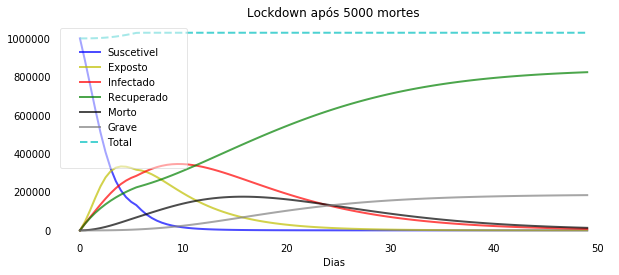

In [59]:
t = np.linspace(0, 49, 100) # tempo
# Integração das EDOs
alpha = 0.9
ret = odeint(model, y0, t, args=(N, beta, gamma, delta, alpha, rho, theta))
S, E, I, G, R, D = ret.T
plotseigrd(t, S, E, I, R, D, G)

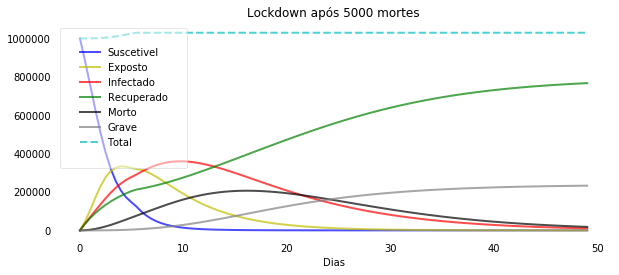

In [60]:
t = np.linspace(0, 49, 100) # tempo
# Integração das EDOs
alpha = 1
ret = odeint(model, y0, t, args=(N, beta, gamma, delta, alpha, rho, theta))
S, E, I, G, R, D = ret.T
plotseigrd(t, S, E, I, R, D, G)